In [6]:
from utils import *
import matplotlib.pyplot as plt

In [7]:
data = get_mixrw_rate('../results/MRW-30', step=10)

files:
../results/MRW-30/MIXREADWRITE-0.0.dat
../results/MRW-30/MIXREADWRITE-0.1.dat
../results/MRW-30/MIXREADWRITE-0.2.dat
../results/MRW-30/MIXREADWRITE-0.3.dat
../results/MRW-30/MIXREADWRITE-0.4.dat
../results/MRW-30/MIXREADWRITE-0.5.dat
../results/MRW-30/MIXREADWRITE-0.6.dat
../results/MRW-30/MIXREADWRITE-0.7.dat
../results/MRW-30/MIXREADWRITE-0.8.dat
../results/MRW-30/MIXREADWRITE-0.9.dat
../results/MRW-30/MIXREADWRITE-1.0.dat


In [8]:
avg = {}
for i, d in data.items():
    avg[i] = avg_rate(d, filter=0)

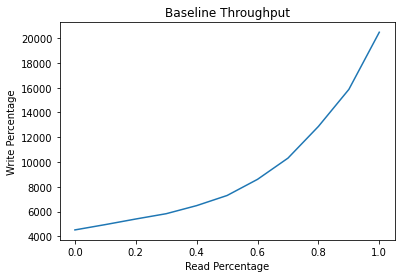

In [10]:
x = []
y = []
for k, v in avg.items():
    x.append(k)
    y.append(v)

plt.figure()
plt.plot(x, y)
plt.xlabel('Read Percentage')
plt.ylabel('Write Percentage')
plt.title('Baseline Throughput')
plt.show()